In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
%matplotlib inline

In [6]:
# read in the file
SeoulBike = pd.read_csv('/Users/jennyskytta/Downloads/IMT575/SeoulBikeData.csv',encoding='latin1')
SeoulBike.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2986,04/04/2018,505,10,10.7,81,1.4,2000,7.5,0.57,0.0,0.0,Spring,No Holiday,Yes
7840,23/10/2018,1294,16,16.1,70,1.3,898,10.6,0.83,0.0,0.0,Autumn,No Holiday,Yes
1631,06/02/2018,106,23,-11.8,46,1.1,1860,-21.1,0.00,0.0,0.0,Winter,No Holiday,Yes
898,07/01/2018,179,10,-1.8,40,1.8,1555,-13.6,0.48,0.0,0.0,Winter,No Holiday,Yes
7748,19/10/2018,1512,20,14.2,56,1.8,2000,5.5,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
SeoulBike.Date.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object>

In [8]:
SeoulBike.shape
SeoulBike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
SeoulBike.rename(columns={'Temperature(°C)':'TempC'}, inplace=True)
SeoulBike.rename(columns={'Humidity(%)':'HumidPerc'}, inplace=True)
SeoulBike.rename(columns={'Functioning Day':'Func_Day'}, inplace=True)
SeoulBike.rename(columns={'Rented Bike Count':'BikeRentCt'}, inplace=True)
SeoulBike.rename(columns={'Wind speed (m/s)':'Windspeed'}, inplace=True)
SeoulBike.rename(columns={'Solar Radiation (MJ/m2)':'SolarRad'}, inplace=True)
SeoulBike.rename(columns={'Rainfall(mm)':'Rainfall'}, inplace=True)
SeoulBike.rename(columns={'Snowfall (cm)':'Snowfall'}, inplace=True)

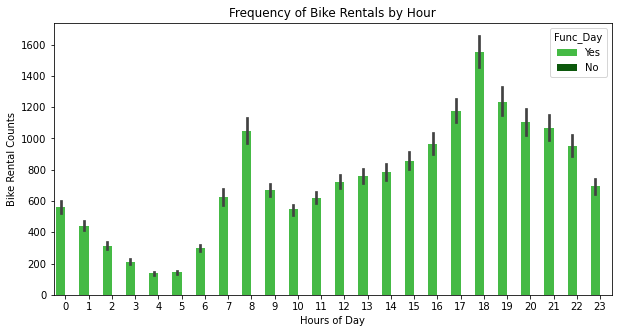

In [10]:
color = ['limegreen','darkgreen','royalblue']

def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue,data=SeoulBike, palette=color);
    
bikey = barplots('Hour','BikeRentCt','Func_Day')
plt.xlabel("Hours of Day")
plt.ylabel("Bike Rental Counts")
plt.title("Frequency of Bike Rentals by Hour") 
plt.show(bikey)

In [11]:
# Correlation with Rented Bike Count
SeoulBike.corr()['BikeRentCt']

BikeRentCt                   1.000000
Hour                         0.410257
TempC                        0.538558
HumidPerc                   -0.199780
Windspeed                    0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
SolarRad                     0.261837
Rainfall                    -0.123074
Snowfall                    -0.141804
Name: BikeRentCt, dtype: float64

<AxesSubplot:>

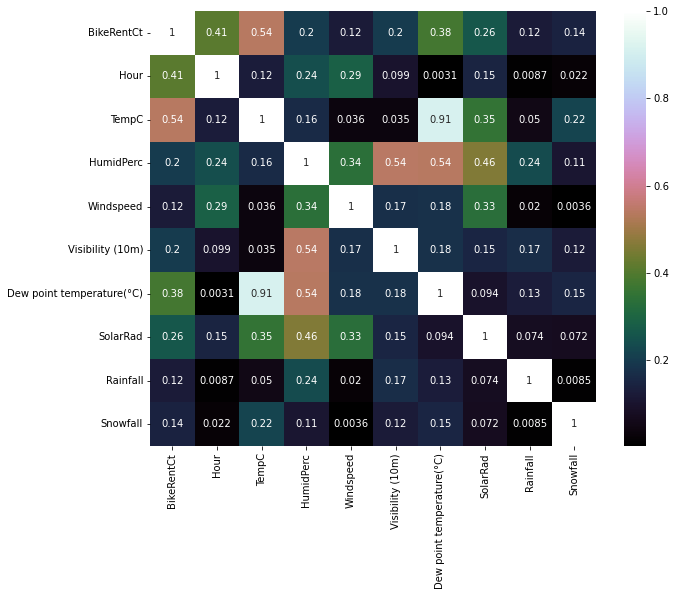

In [12]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(SeoulBike.corr()), cmap='cubehelix', annot=True)

In [13]:
SeoulBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   BikeRentCt                 8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   TempC                      8760 non-null   float64
 4   HumidPerc                  8760 non-null   int64  
 5   Windspeed                  8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   SolarRad                   8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Func_Day                   8760 non-null   objec

In [14]:
# Statistical info 
SeoulBike.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BikeRentCt,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
TempC,8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
HumidPerc,8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Windspeed,8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
SolarRad,8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall,8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [15]:
# converting date column dtype object to date 

SeoulBike['Date'] = pd.to_datetime(SeoulBike['Date'])

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarn

In [16]:
# split day of week, month and year in three column
SeoulBike['day_of_week'] = SeoulBike['Date'].dt.day_name() # extract week name from Date column
SeoulBike["month"] = SeoulBike['Date'].dt.month_name()   # extract month name from Date column
SeoulBike["year"] = SeoulBike['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [17]:
# drop the Date column
SeoulBike.drop(columns=['Date'],inplace=True)

SeoulBike.sample(5)

,BikeRentCt,Hour,TempC,HumidPerc,Windspeed,Visibility (10m),Dew point temperature(°C),SolarRad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,day_of_week,month,year
1856,68,8,-5.4,38,0.7,2000,-17.5,0.04,0.0,0.0,Winter,Holiday,Yes,Friday,February,2018
4713,1170,9,20.1,65,1.4,2000,13.3,0.93,0.0,0.0,Summer,No Holiday,Yes,Friday,June,2018
1008,105,0,-13.6,49,1.6,2000,-22.0,0.00,0.0,0.0,Winter,No Holiday,Yes,Saturday,December,2018
8046,433,6,2.9,75,0.2,1761,-1.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,Thursday,January,2018
4951,1620,7,22.1,74,0.3,830,17.2,0.37,0.0,0.0,Summer,No Holiday,Yes,Monday,June,2018


In [18]:
# Divide Data in categorical and numerical features
numeric_features= SeoulBike.select_dtypes(exclude='object')
categorical_features=SeoulBike.select_dtypes(include='object')

In [19]:
numeric_features.head()

,BikeRentCt,Hour,TempC,HumidPerc,Windspeed,Visibility (10m),Dew point temperature(°C),SolarRad,Rainfall,Snowfall
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [20]:
categorical_features.head()

,Seasons,Holiday,Func_Day,day_of_week,month,year
0,Winter,No Holiday,Yes,Thursday,January,2017
1,Winter,No Holiday,Yes,Thursday,January,2017
2,Winter,No Holiday,Yes,Thursday,January,2017
3,Winter,No Holiday,Yes,Thursday,January,2017
4,Winter,No Holiday,Yes,Thursday,January,2017


In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 

enc = OrdinalEncoder()
enc.fit(SeoulBike[["Seasons","Holiday", "Func_Day", "day_of_week", "month", "year"]])
SeoulBike[["Seasons","Holiday", "Func_Day", "day_of_week", "month", "year"]] = enc.transform(SeoulBike[["Seasons", "Holiday", "Func_Day", "day_of_week", "month", "year"]])

In [22]:
from sklearn.model_selection import train_test_split

#assign my outcome vector 
y = SeoulBike["BikeRentCt"]
X = SeoulBike[["Seasons", "Holiday", "Func_Day", "day_of_week", "Hour", "TempC", "HumidPerc","Windspeed", "SolarRad", "Rainfall", 'Snowfall']]

Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.25)

In [23]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics

KNN = KNeighborsRegressor(n_neighbors=4).fit(Xt,yt)

y_pred = KNN.predict(Xv) # These are the predictions from the test data.

R2 = KNN.score(Xv,yv)
print('R-Squred:', KNN.score(Xv,yv))
print('Mean Absolute Error:', metrics.mean_absolute_error(yv,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yv,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yv,y_pred)))

R-Squred: 0.7139681251449104
Mean Absolute Error: 217.98264840182648
Mean Squared Error: 119703.0558219178
Root Mean Squared Error: 345.9812940346888


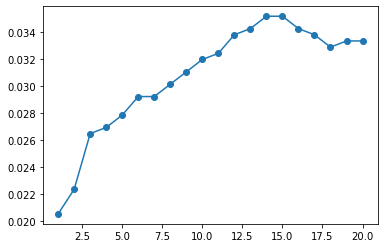

In [24]:
accuracies = []
for k in range(1,21):
    m = KNeighborsClassifier(k)
    m.fit(Xt, yt)
    accuracies.append(m.score(Xv, yv))

_ = plt.plot(range(1,21), accuracies, marker="o")

In [25]:
#Random Forest - Akhila B

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(Xt, yt)
y_pred = regressor.predict(Xv)
print(y_pred)

[266.95 309.55 247.2  ... 410.9   98.65 217.55]


In [26]:
from sklearn import metrics

print('R-Squred:', regressor.score(Xv,yv))
print('Mean Absolute Error:', metrics.mean_absolute_error(yv, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yv, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yv, y_pred)))

R-Squred: 0.8868307130537072
Mean Absolute Error: 134.90990867579907
Mean Squared Error: 47360.83864611872
Root Mean Squared Error: 217.62545495901603


Text(0.5, 1.0, 'Random Forest Predictive model')

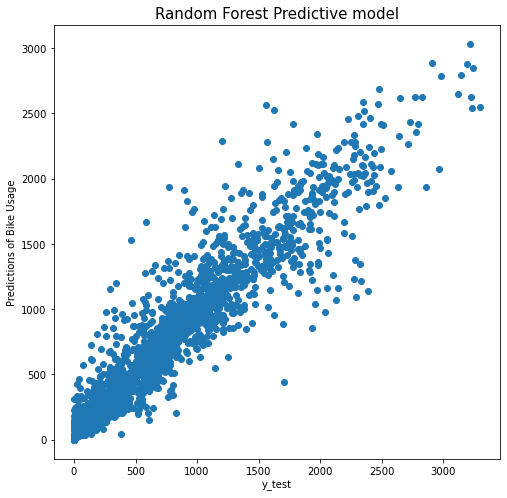

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(yv,y_pred)
plt.savefig('pic.png', dpi=80)
plt.xlabel("y_test")
plt.ylabel("Predictions of Bike Usage")
plt.title("Random Forest Predictive model",fontsize=15)

Text(0.5, 1.0, 'K Regressor Predictive model')

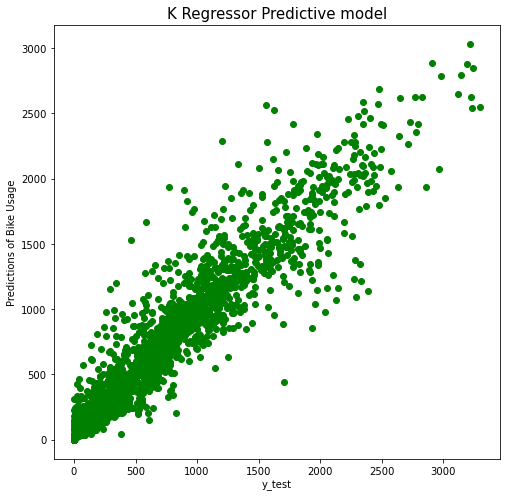

In [30]:
plt.figure(figsize=(8, 8))
plt.scatter(yv,y_pred,color="green")
plt.savefig('pic.png', dpi=80)
plt.xlabel("y_test")
plt.ylabel("Predictions of Bike Usage")
plt.title("K Regressor Predictive model",fontsize=15)

In [31]:
import statsmodels.api as sm

model_four = sm.OLS(y, X).fit()
print(model_four.summary())
y_pred = model_four.predict(X)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y,y_pred))
print('Mean Squared Error:', mean_squared_error(y,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y,y_pred)))

                                 OLS Regression Results                                
Dep. Variable:             BikeRentCt   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              3036.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):                        0.00
Time:                        16:20:02   Log-Likelihood:                         -65654.
No. Observations:                8760   AIC:                                  1.313e+05
Df Residuals:                    8749   BIC:                                  1.314e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [32]:
R2 = KNN.score(Xv,yv)
print('R-Squred:', KNN.score(Xv,yv))
print('Mean Absolute Error:', metrics.mean_absolute_error(yv,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yv,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yv,y_pred)))

R-Squred: 0.7139681251449104


ValueError: Found input variables with inconsistent numbers of samples: [2190, 8760]

In [33]:
plt.figure(figsize=(8, 8))
sns.regplot(x='Dew point temperature(°C)', y='BikeRentCt', data=SeoulBike, color=next(colors));
plt.savefig('pic.png', dpi=80)
plt.xlabel("Dew point temperature(°C)")
plt.ylabel("Count of Bike Usage")
plt.title("Dew Point on Bike usage",fontsize=15)

NameError: name 'colors' is not defined

<Figure size 576x576 with 0 Axes>

In [34]:
plt.figure(figsize=(8, 8))
sns.regplot(x='TempC', y='BikeRentCt', data=SeoulBike, color=next(colors));
plt.savefig('pic.png', dpi=80)
plt.xlabel("Temperature")
plt.ylabel("Count of Bike Usage")
plt.title("Temperature (°C)",fontsize=15)

NameError: name 'colors' is not defined

<Figure size 576x576 with 0 Axes>

ValueError: x and y must be the same size

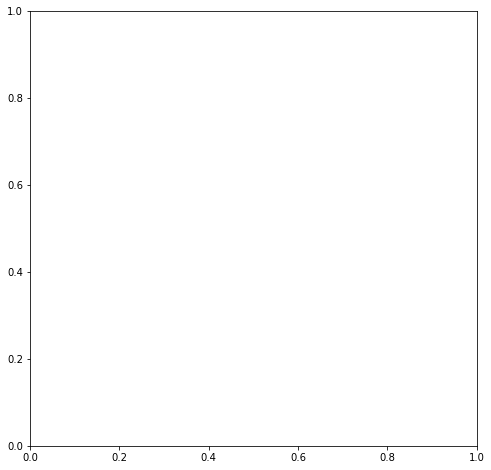

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(yv,y_pred,color="green")
plt.savefig('pic.png', dpi=80)
plt.xlabel("y_test")
plt.ylabel("Predictions of Bike Usage")
plt.title("K Regressor Predictive model",fontsize=15)